In [23]:
""" The dataset for this experiment is freely available on the Kaggle website.
Download the dataset from this link https://www.kaggle.com/competitions/titanic/data?select=train.csv. 
Once the dataset is downloaded it is divided into three CSV files gender submission.csv train.csv and test.csv
"""

' The dataset for this experiment is freely available on the Kaggle website.\nDownload the dataset from this link https://www.kaggle.com/competitions/titanic/data?select=train.csv. \nOnce the dataset is downloaded it is divided into three CSV files gender submission.csv train.csv and test.csv\n'

In [24]:
#Importing Libraries and Initial setup
import warnings 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight') 
%matplotlib inline 
warnings.filterwarnings('ignore') 


In [25]:
#Now let’s read the training and test data using the pandas data frame.
train = pd.read_csv('train.csv') 
test = pd.read_csv('test.csv') 

# To know number of columns and rows 
train.shape 
# (891, 12) 


(891, 12)

In [26]:
#To know the information about each column like the data type, etc we use the df.info() function.
train.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
#Now let’s see if there are any NULL values present in the dataset.
#This can be checked using the isnull() function. It yields the following output.
train.isnull().sum() 


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

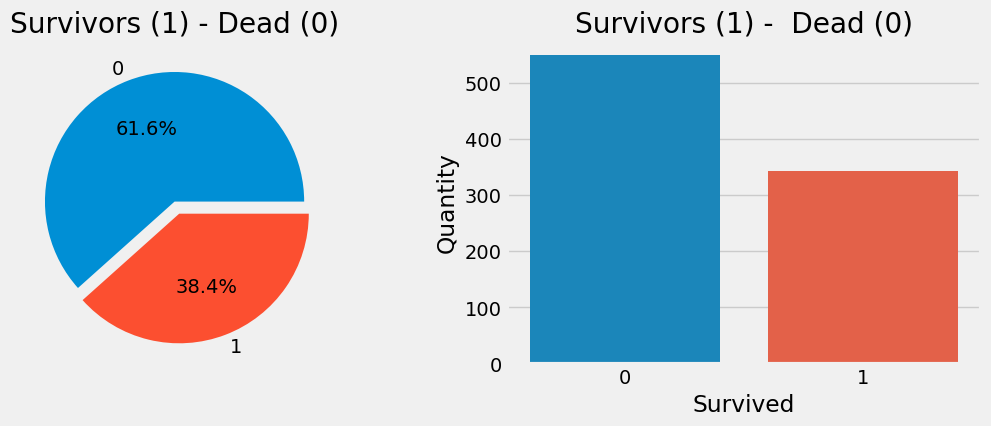

In [28]:
"""Now let us visualize the data using some pie charts and histograms to get a proper understanding of the data.

Let us first visualize the number of survivors and death counts."""

f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
train['Survived'].value_counts().plot.pie( 
	explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False) 
ax[0].set_title('Survivors (1) - Dead (0)') 
ax[0].set_ylabel('') 
sns.countplot('Survived', data=train, ax=ax[1]) 
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survivors (1) -  Dead (0)') 
plt.show() 


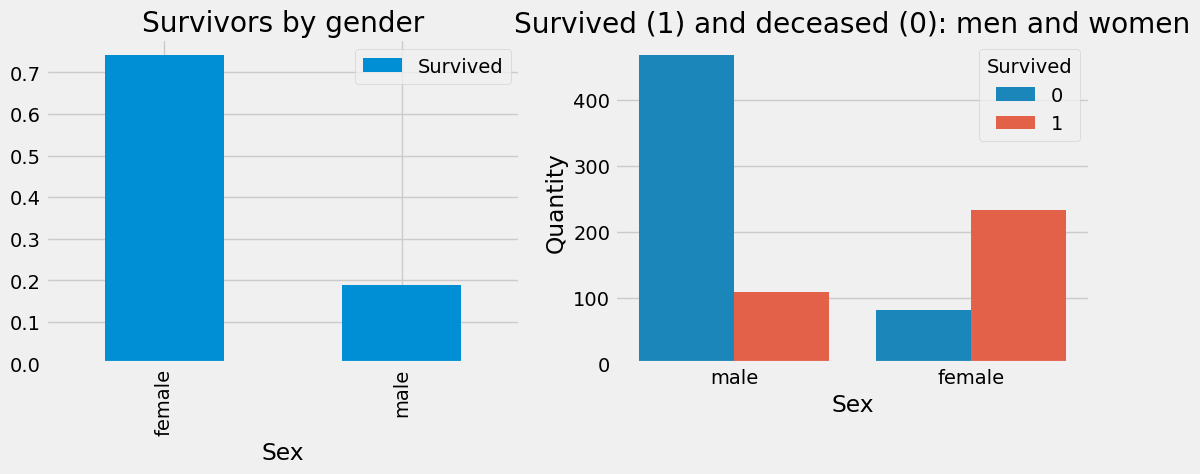

In [29]:
#Gender feature
f, ax = plt.subplots(1, 2, figsize=(12, 4)) 
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) 
ax[0].set_title('Survivors by gender') 
sns.countplot('Sex', hue='Survived', data=train, ax=ax[1]) 
ax[1].set_ylabel('Quantity') 
ax[1].set_title('Survived (1) and deceased (0): men and women') 
plt.show() 


In [30]:
"""Feature Engineering
Now let’s see which columns should we drop and/or modify for the model to predict the testing data.
The main tasks in this step is to drop unnecessary features and to convert string data into the numerical category 
for easier training.
We’ll start off by dropping the Cabin feature since not a lot more useful information can be extracted from it. 
But we will make a new column from the Cabins column to see if there was cabin information allotted or not."""

# Create a new column cabinbool indicating 
# if the cabin value was given or was NaN 
train["CabinBool"] = (train["Cabin"].notnull().astype('int')) 
test["CabinBool"] = (test["Cabin"].notnull().astype('int')) 

# Delete the column 'Cabin' from test 
# and train dataset 
train = train.drop(['Cabin'], axis=1) 
test = test.drop(['Cabin'], axis=1)


In [31]:
#We can also drop the Ticket feature since it’s unlikely to yield any useful information
train = train.drop(['Ticket'], axis=1) 
test = test.drop(['Ticket'], axis=1) 


In [32]:
"""There are missing values in the Embarked feature.
For that, we will replace the NULL values with ‘S’ as the number of Embarks for ‘S’ are higher than the other two."""

# replacing the missing values in 
# the Embarked feature with S 
train = train.fillna({"Embarked": "S"}) 


In [33]:
"""We will now sort the age into groups. We will combine the age groups of the people and categorize them into the same groups.
BY doing so we will be having fewer categories and will have a better prediction since it will be a categorical dataset."""

# sort the ages into logical categories 
train["Age"] = train["Age"].fillna(-0.5) 
test["Age"] = test["Age"].fillna(-0.5) 
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf] 
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 
		'Student', 'Young Adult', 'Adult', 'Senior'] 
train['AgeGroup'] = pd.cut(train["Age"], bins, labels=labels) 
test['AgeGroup'] = pd.cut(test["Age"], bins, labels=labels) 


In [34]:
"""In the ‘title’ column for both the test and train set, we will categorize them into an equal number of classes.
Then we will assign numerical values to the title for convenience of model training."""

# create a combined group of both datasets 
combine = [train, test] 

# extract a title for each Name in the 
# train and test datasets 
for dataset in combine: 
	dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False) 

pd.crosstab(train['Title'], train['Sex']) 

# replace various titles with more common names 
for dataset in combine: 
	dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona','Rare']) 

	dataset['Title'] = dataset['Title'].replace( 
		['Countess', 'Lady', 'Sir'], 'Royal') 
	dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss') 
	dataset['Title'] = dataset['Title'].replace('Ms', 'Miss') 
	dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs') 

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() 

# map each of the title groups to a numerical value 
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, 
				"Master": 4, "Royal": 5, "Rare": 6} 
for dataset in combine: 
	dataset['Title'] = dataset['Title'].map(title_mapping) 
	dataset['Title'] = dataset['Title'].fillna(0) 


In [35]:
#Now using the title information we can fill in the missing age values.
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() # Young Adult 
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() # Student 
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() # Adult 
master_age = train[train["Title"] == 4]["AgeGroup"].mode() # Baby 
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() # Adult 
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() # Adult 

age_title_mapping = {1: "Young Adult", 2: "Student", 
					3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"} 

for x in range(len(train["AgeGroup"])): 
	if train["AgeGroup"][x] == "Unknown": 
		train["AgeGroup"][x] = age_title_mapping[train["Title"][x]] 

for x in range(len(test["AgeGroup"])): 
	if test["AgeGroup"][x] == "Unknown": 
		test["AgeGroup"][x] = age_title_mapping[test["Title"][x]] 


In [36]:
"""Now assign a numerical value to each age category.
Once we have mapped the age into different categories we do not need the age feature. Hence drop it"""

# map each Age value to a numerical value 
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 
			'Student': 4, 'Young Adult': 5, 'Adult': 6, 
			'Senior': 7} 
train['AgeGroup'] = train['AgeGroup'].map(age_mapping) 
test['AgeGroup'] = test['AgeGroup'].map(age_mapping) 

train.head() 

# dropping the Age feature for now, might change 
train = train.drop(['Age'], axis=1) 
test = test.drop(['Age'], axis=1) 


In [37]:
#Drop the name feature since it contains no more useful information.
train = train.drop(['Name'], axis=1) 
test = test.drop(['Name'], axis=1) 


In [38]:
#Assign numerical values to sex and embarks categories
sex_mapping = {"male": 0, "female": 1} 
train['Sex'] = train['Sex'].map(sex_mapping) 
test['Sex'] = test['Sex'].map(sex_mapping) 

embarked_mapping = {"S": 1, "C": 2, "Q": 3} 
train['Embarked'] = train['Embarked'].map(embarked_mapping) 
test['Embarked'] = test['Embarked'].map(embarked_mapping) 


In [39]:
#Fill in the missing Fare value in the test set based on the mean fare for that P-class
for x in range(len(test["Fare"])): 
	if pd.isnull(test["Fare"][x]): 
		pclass = test["Pclass"][x] # Pclass = 3 
		test["Fare"][x] = round( 
			train[train["Pclass"] == pclass]["Fare"].mean(), 4) 

# map Fare values into groups of 
# numerical values 
train['FareBand'] = pd.qcut(train['Fare'], 4, 
							labels=[1, 2, 3, 4]) 
test['FareBand'] = pd.qcut(test['Fare'], 4, 
						labels=[1, 2, 3, 4]) 

# drop Fare values 
train = train.drop(['Fare'], axis=1) 
test = test.drop(['Fare'], axis=1) 


In [40]:
"""Model Training
We will be using Random forest as the algorithm of choice to perform model training.
Before that, we will split the data in an 80:20 ratio as a train-test split.
For that, we will use the train_test_split() from the sklearn library."""

from sklearn.model_selection import train_test_split 

# Drop the Survived and PassengerId 
# column from the trainset 
predictors = train.drop(['Survived', 'PassengerId'], axis=1) 
target = train["Survived"] 
x_train, x_val, y_train, y_val = train_test_split( 
	predictors, target, test_size=0.2, random_state=0) 


In [41]:
#Now import the random forest function from the ensemble module of sklearn and for the training set.

from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 

randomforest = RandomForestClassifier() 

# Fit the training data along with its output 
randomforest.fit(x_train, y_train) 
y_pred = randomforest.predict(x_val) 

# Find the accuracy score of the model 
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2) 
print(acc_randomforest) 


84.36


In [42]:
"""Prediction
We are provided with the testing dataset on which we have to perform the prediction.
To predict, we will pass the test dataset into our trained model and save it into a CSV file containing the information,
passengerid and survival. PassengerId will be the passengerid of the passengers in the test data and the survival 
will column will be either 0 or 1. Survivors - 1 and Dead - 0"""

'Prediction\nWe are provided with the testing dataset on which we have to perform the prediction.\nTo predict, we will pass the test dataset into our trained model and save it into a CSV file containing the information,\npassengerid and survival. PassengerId will be the passengerid of the passengers in the test data and the survival \nwill column will be either 0 or 1.'

In [43]:
ids = test['PassengerId'] 
predictions = randomforest.predict(test.drop('PassengerId', axis=1)) 

# set the output as a dataframe and convert 
# to csv file named resultfile.csv 
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions}) 
output.to_csv('resultfile.csv', index=False)   #This will create a resultfile.csv
